In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thermoDataGrabber as DG
%matplotlib inline

#print(plt.style.available)
plt.style.use(["seaborn-talk","seaborn-notebook","seaborn-paper"])

In [5]:
myfluid = DG.ThermoFluid("Water", "T", "P", "U", 100, "viridis")
print(myfluid.data.shape)

(9801, 3)


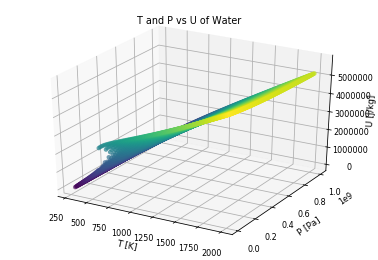

In [6]:
myfluid.show_plot()

In [ ]:
myfluid.write_data()